In [272]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

In [273]:
class ImagesToAnalyse:
    def __init__(self, src):
        """
        Utworzenie róznych palet kolorów dla obrazu wejściowego
        """
        self.rgbImg = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
        self.xyzImg = cv2.cvtColor(src, cv2.COLOR_BGR2XYZ)
        self.labImg = cv2.cvtColor(src, cv2.COLOR_BGR2LAB)
        self.hlsImg = cv2.cvtColor(src, cv2.COLOR_BGR2HLS)
        self.hsvImg = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

        """
        Konwersja każdej palety do skali szarości
        """
        self.rgbGray = cv2.cvtColor(self.rgbImg, cv2.COLOR_RGB2GRAY)
        self.xyzGray = self.xyzImg[:, :, 1]
        self.labGray = self.labImg[:, :, 0]
        self.hlsGray = self.hlsImg[:, :, 1]
        self.hsvGray = self.hsvImg[:, :, 2]
        
        """
        Utworzenie 3 skali zaszumienia obrazu: 3 różne rozmycia Gaussa oraz 3 różne szumy Sól i Pieprz
        """
        (self.rgbGauss3, self.rgbSaltPepper01) = self.makeSalt_Gauss(self.rgbGray, 3, 0.1)
        (self.xyzGauss3, self.xyzSaltPepper01) = self.makeSalt_Gauss(self.xyzGray, 3, 0.1)
        (self.labGauss3, self.labSaltPepper01) = self.makeSalt_Gauss(self.labGray, 3, 0.1)
        (self.hlsGauss3, self.hlsSaltPepper01) = self.makeSalt_Gauss(self.hlsGray, 3, 0.1)
        (self.hsvGauss3, self.hsvSaltPepper01) = self.makeSalt_Gauss(self.hsvGray, 3, 0.1)
        
        (self.rgbGauss9, self.rgbSaltPepper02) = self.makeSalt_Gauss(self.rgbGray, 9, 0.2)
        (self.xyzGauss9, self.xyzSaltPepper02) = self.makeSalt_Gauss(self.xyzGray, 9, 0.2)
        (self.labGauss9, self.labSaltPepper02) = self.makeSalt_Gauss(self.labGray, 9, 0.2)
        (self.hlsGauss9, self.hlsSaltPepper02) = self.makeSalt_Gauss(self.hlsGray, 9, 0.2)
        (self.hsvGauss9, self.hsvSaltPepper02) = self.makeSalt_Gauss(self.hsvGray, 9, 0.2)
        
        (self.rgbGauss15, self.rgbSaltPepper03) = self.makeSalt_Gauss(self.rgbGray, 15, 0.3)
        (self.xyzGauss15, self.xyzSaltPepper03) = self.makeSalt_Gauss(self.xyzGray, 15, 0.3)
        (self.labGauss15, self.labSaltPepper03) = self.makeSalt_Gauss(self.labGray, 15, 0.3)
        (self.hlsGauss15, self.hlsSaltPepper03) = self.makeSalt_Gauss(self.hlsGray, 15, 0.3)
        (self.hsvGauss15, self.hsvSaltPepper03) = self.makeSalt_Gauss(self.hsvGray, 15, 0.3)

        """
        Kompresja obrazów do 3 różnych jakości JPEG
        """
        self.rgbJPEG1 = self.compressionJpeg(self.rgbGray, 1)
        self.xyzJPEG1 = self.compressionJpeg(self.xyzGray, 1)
        self.labJPEG1 = self.compressionJpeg(self.labGray, 1)
        self.hlsJPEG1 = self.compressionJpeg(self.hlsGray, 1)
        self.hsvJPEG1 = self.compressionJpeg(self.hsvGray, 1)

        self.rgbJPEG15 = self.compressionJpeg(self.rgbGray, 15)
        self.xyzJPEG15 = self.compressionJpeg(self.xyzGray, 15)
        self.labJPEG15 = self.compressionJpeg(self.labGray, 15)
        self.hlsJPEG15 = self.compressionJpeg(self.hlsGray, 15)
        self.hsvJPEG15 = self.compressionJpeg(self.hsvGray, 15)

        self.rgbJPEG55 = self.compressionJpeg(self.rgbGray, 55)
        self.xyzJPEG55 = self.compressionJpeg(self.xyzGray, 55)
        self.labJPEG55 = self.compressionJpeg(self.labGray, 55)
        self.hlsJPEG55 = self.compressionJpeg(self.hlsGray, 55)
        self.hsvJPEG55 = self.compressionJpeg(self.hsvGray, 55)

    def add_salt_and_pepper_noise(self, image, noise_ratio):
        noisy_image = image.copy()
        h, w = noisy_image.shape
        noisy_pixels = int(h * w * noise_ratio)
        for x in range(noisy_pixels):
            row, col = np.random.randint(0, h), np.random.randint(0, w)
            if np.random.rand() < 0.5:
                noisy_image[row, col] = 0
            else:
                noisy_image[row, col] = 255
        return noisy_image

    def compressionJpeg(self, image, jpeg_quality):
        cv2.imwrite('lossy_compressed_image.jpg', image, [cv2.IMWRITE_JPEG_QUALITY, jpeg_quality])
        result = cv2.imread('./lossy_compressed_image.jpg')
        result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
        return result

    def makeSalt_Gauss(self, im_to_operate, GaussRatio, SPRatio):
        gaussian_result = cv2.GaussianBlur(im_to_operate, (GaussRatio, GaussRatio), cv2.BORDER_DEFAULT)
        salt_and_pepper_result = self.add_salt_and_pepper_noise(im_to_operate, SPRatio)
        return gaussian_result, salt_and_pepper_result

In [274]:
def SSIM(baseImage, compareImage):
    result = ssim(baseImage, compareImage, data_range=compareImage.max() - compareImage.min())
    print(result)

1.0


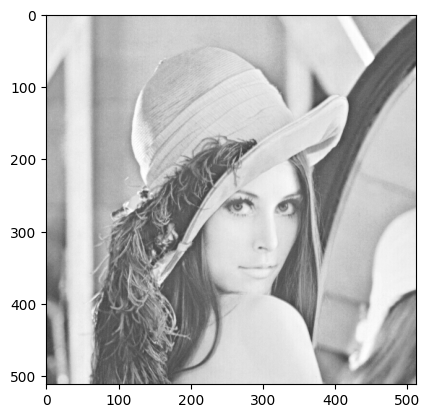

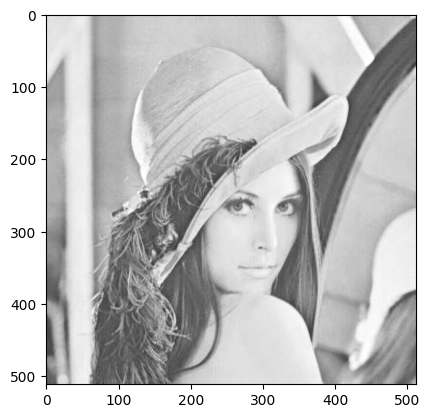

In [275]:
Image = ImagesToAnalyse(cv2.imread("./IMG.png"))
plt.imshow(Image.hsvGray, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(Image.hsvJPEG55, cmap='gray', vmin=0, vmax=255)
SSIM(Image.hsvGray, Image.hsvGray)